# Разбор датасета Give Me Some Credit от Kaggle соревнования

## Импортируем нужные библиотеки и скачиваем данные.

In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_train = pd.read_csv('GiveMeSomeCredit-training.csv')
data_test = pd.read_csv('GiveMeSomeCredit-testing.csv')

## Выбираем числовые признаки. Заметим, что все признаки числовые.

In [243]:
numeric_train = data_train.select_dtypes([np.number])
numeric_train

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [244]:
numeric_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

## В ежемесячном доходе (MonthlyIncome), а также в количестве иждивенцев (NumberOfDependents) есть пропуски. Для начала попробуем заменить пропуски на среднее значение.

In [245]:
income_mean = numeric_train['MonthlyIncome'].mean()
numeric_train['MonthlyIncome'] = numeric_train['MonthlyIncome'].fillna(income_mean)

dependents_mean = numeric_train['NumberOfDependents'].mean()
numeric_train['NumberOfDependents'] = numeric_train['NumberOfDependents'].fillna(dependents_mean)


income_mean = data_test['MonthlyIncome'].mean()
data_test['MonthlyIncome'] = data_test['MonthlyIncome'].fillna(income_mean)

dependents_mean = data_test['NumberOfDependents'].mean()
data_test['NumberOfDependents'] = data_test['NumberOfDependents'].fillna(dependents_mean)

## Рассмотрим зависимости признаков от таргета.

[Text(0.5, 0, 'correlation'), Text(0, 0.5, 'features')]

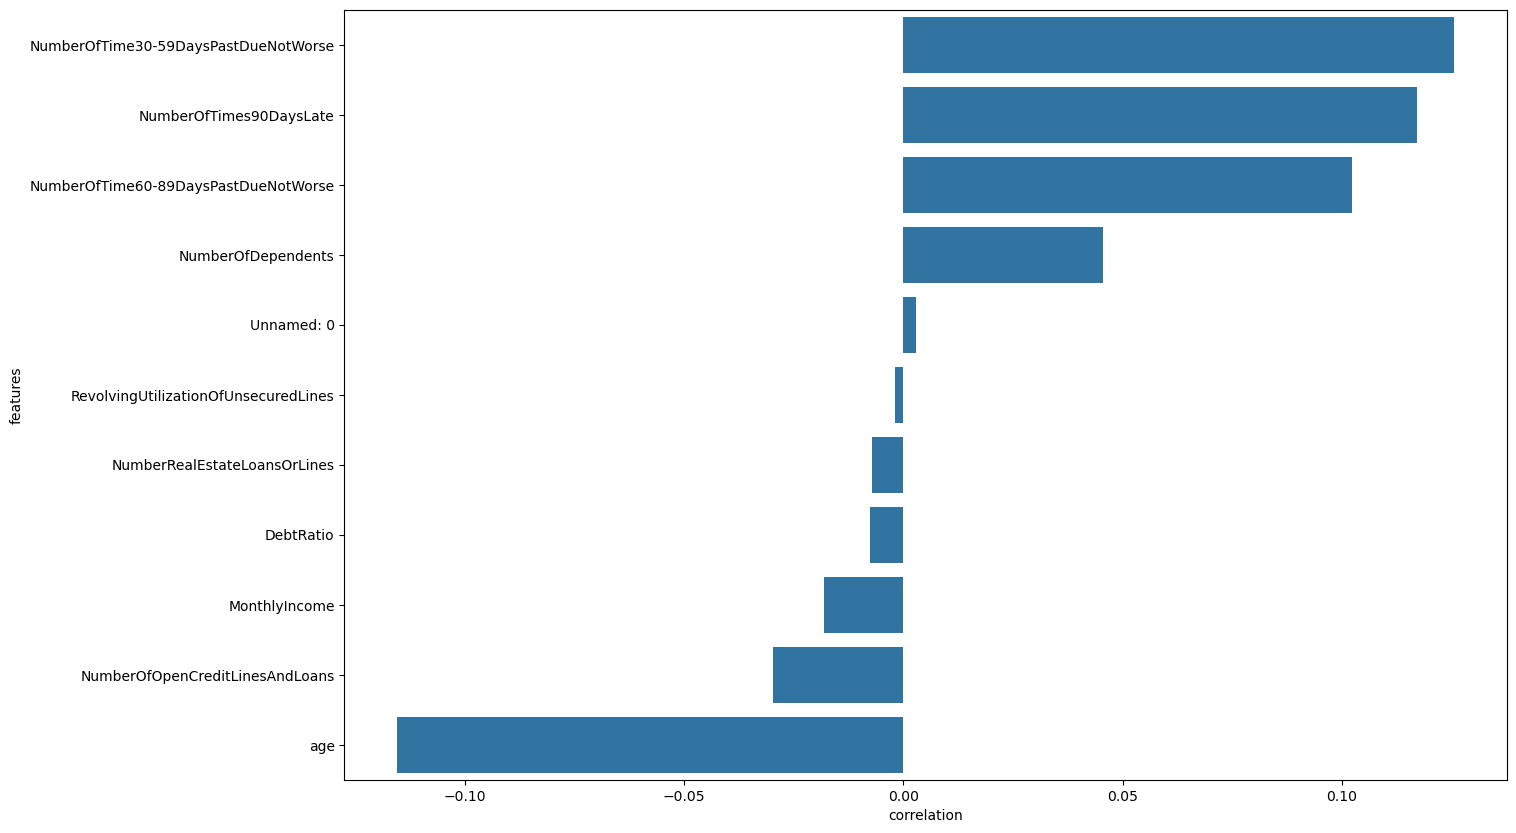

In [246]:
import seaborn as sns
X_train = numeric_train.drop(['SeriousDlqin2yrs'], axis=1)
y_train = numeric_train['SeriousDlqin2yrs']


correlations = X_train.corrwith(y_train).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)
plot.set(xlabel='correlation', ylabel='features')

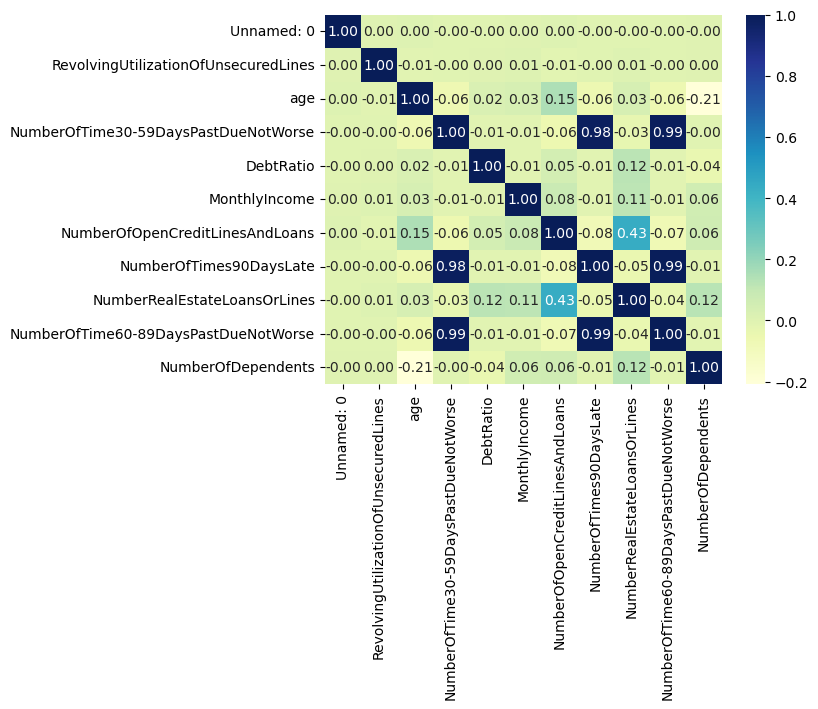

In [247]:
dataplot = sns.heatmap(X_train.corr(), cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()

### Посмотрим на дизбаланс целевой переменной SeriousDlqin2yrs. Заметим, что людей с
### целевой переменной, равной 1 всего 6.7%.

,Value,Percentage,Count
0,0,93.3,139974
1,1,6.7,10026


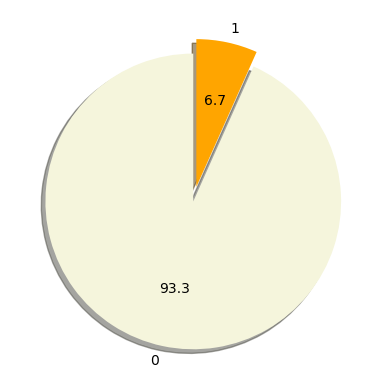

In [248]:
colors = ("beige", "orange")
y_train.value_counts().plot.pie(
        autopct="%.1f",
        explode = np.full(y_train.nunique(), 0.05),
        shadow = True,
        colors = colors[:y_train.nunique()],
        fontsize=10,
        startangle = 90,
        ylabel='')
target_df = pd.DataFrame({'Value' : [0, 1], 'Percentage' : [93.3, 6.7], 'Count' : [len(y_train[y_train == 0]), len(y_train[y_train==1])]})
target_df

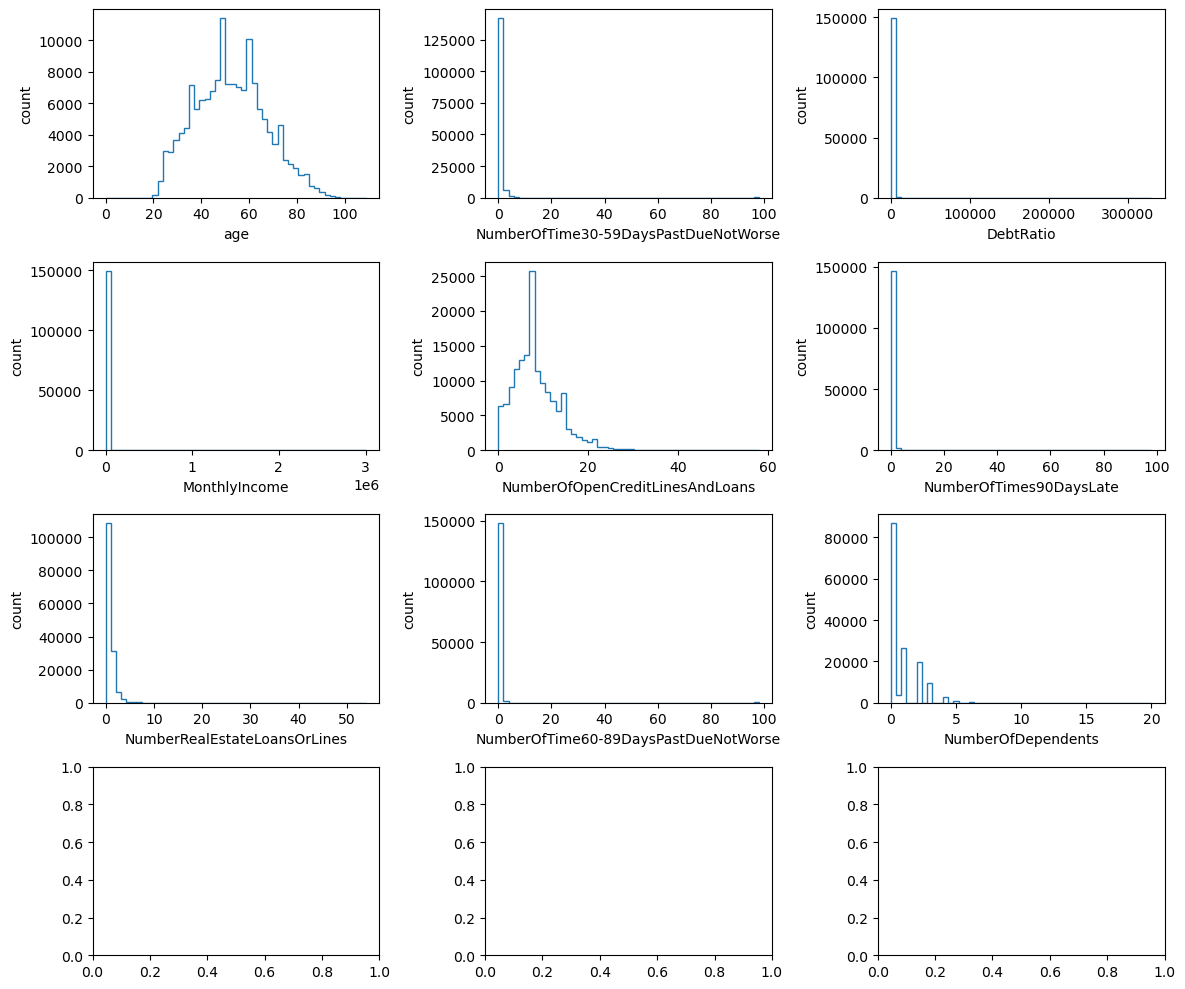

In [249]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10))
X_train.rename(columns={'Unnamed: 0':'ID'}, inplace=True)

X_train = X_train.drop(['ID'], axis=1)
for i, col in enumerate(X_train.columns[1:]):
    ax_i = axes[i // 3][i % 3]
    ax_i.hist(X_train[col], 50, range=(min(X_train[col]), max(X_train[col])), histtype ='step', 
         stacked = True, 
         fill = False)
    ax_i.set_xlabel(col)
    ax_i.set_ylabel('count')
plt.subplots_adjust(wspace=1, hspace=1.5)
plt.tight_layout()

In [250]:
X_train[X_train['age'] == 0] = X_train['age'].median()

## Рассмотрим разные фичи, их уникальные значения и количества.


In [251]:
X_train['RevolvingUtilizationOfUnsecuredLines'].value_counts().sort_index()

RevolvingUtilizationOfUnsecuredLines
0.000000        10878
0.000008            1
0.000010            1
0.000013            1
0.000014            1
                ...  
20514.000000        1
22000.000000        1
22198.000000        1
29110.000000        1
50708.000000        1
Name: count, Length: 125729, dtype: int64

In [252]:
X_train['age'].value_counts()

age
49     3837
48     3806
50     3753
63     3719
47     3719
       ... 
103       3
102       3
109       2
107       1
105       1
Name: count, Length: 85, dtype: int64

In [253]:
X_train['NumberOfTime30-59DaysPastDueNotWorse'].value_counts().sort_index()

NumberOfTime30-59DaysPastDueNotWorse
0     126018
1      16032
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
52         1
96         5
98       264
Name: count, dtype: int64

In [254]:
X_train['NumberOfOpenCreditLinesAndLoans'].value_counts()

NumberOfOpenCreditLinesAndLoans
6     13613
7     13245
5     12931
8     12562
4     11609
9     11355
10     9624
3      9058
11     8321
12     7005
2      6666
13     5667
14     4546
1      4438
15     3645
16     3000
17     2370
0      1888
18     1874
19     1433
20     1169
21      864
22      685
23      533
24      422
25      337
26      239
27      194
28      150
29      114
30       88
31       74
32       52
33       47
34       35
35       27
36       18
38       13
40       10
39        9
42        8
45        8
43        8
37        7
48        6
49        4
54        4
52        4
41        4
46        3
57        2
51        2
56        2
47        2
50        2
44        2
58        1
53        1
Name: count, dtype: int64

In [255]:
X_train['NumberOfTimes90DaysLate'].value_counts()

NumberOfTimes90DaysLate
0     141661
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
96         5
11         5
13         4
15         2
14         2
12         2
52         1
17         1
Name: count, dtype: int64

In [256]:
X_train['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

NumberOfTime60-89DaysPastDueNotWorse
0     142395
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
52         1
9          1
Name: count, dtype: int64

In [257]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

## Определим функцию, рисующую ROC-AUC кривую.

In [258]:
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay


def depict_pr_roc(y_true, y_pred, classifier_name='Some Classifier', ax=None):
  if ax is None:
    fig, ax = plt.subplots(1, 2, figsize=(11, 5))

  print(classifier_name, 'metrics')
  PrecisionRecallDisplay.from_predictions(y_true, y_pred, ax=ax[0], name=classifier_name)
  precision, recall, _ = precision_recall_curve(y_true, y_pred)
  print('AUC-PR: %.5f' % auc(recall, precision))
  ax[0].set_title("PRC")
  ax[0].set_ylim(0, 1.1)

  RocCurveDisplay.from_predictions(y_true, y_pred, ax=ax[1], name=classifier_name)
  print('AUC-ROC: %.5f' % roc_auc_score(y_true, y_pred))
  ax[1].set_title("ROC")
  ax[1].set_ylim(0, 1.1)

  plt.tight_layout()
  plt.legend()

## Начнем с простого и проверим baseline-модель, а именно логистическую регрессию.

Logistic Regression metrics
AUC-PR: 0.23736
AUC-ROC: 0.69950


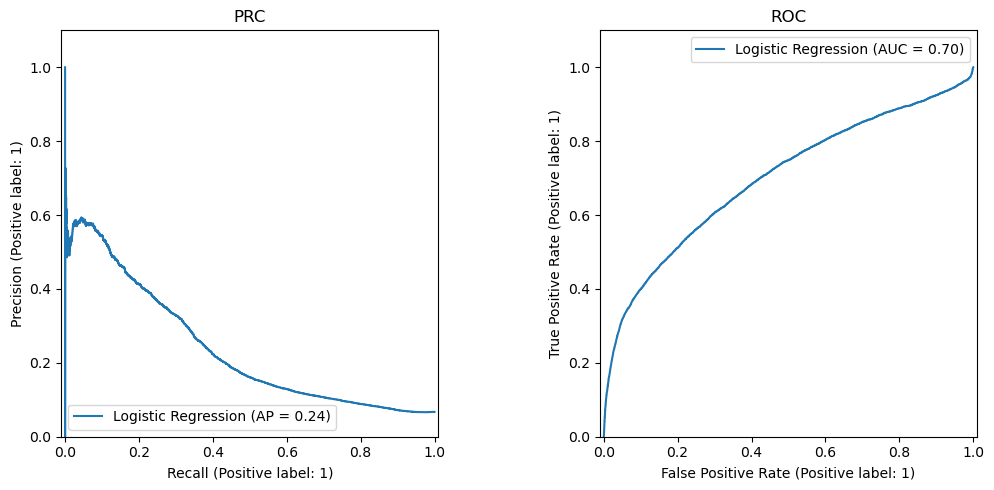

In [259]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train, y_train)
depict_pr_roc(y_train, clf.predict_proba(X_train)[:, 1], 'Logistic Regression')

## Видно, что наш baseline, хотя бы не близок к рандомному классификатору. Попробуем улучшить нашу модель подбором гиперпараметров при помощи кросс-валидации. Видно, что даже с поиском оптимальных гиперпараметров качество не улучшается.

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fi

Best Logistic Regression metrics
AUC-PR: 0.22857
AUC-ROC: 0.69758


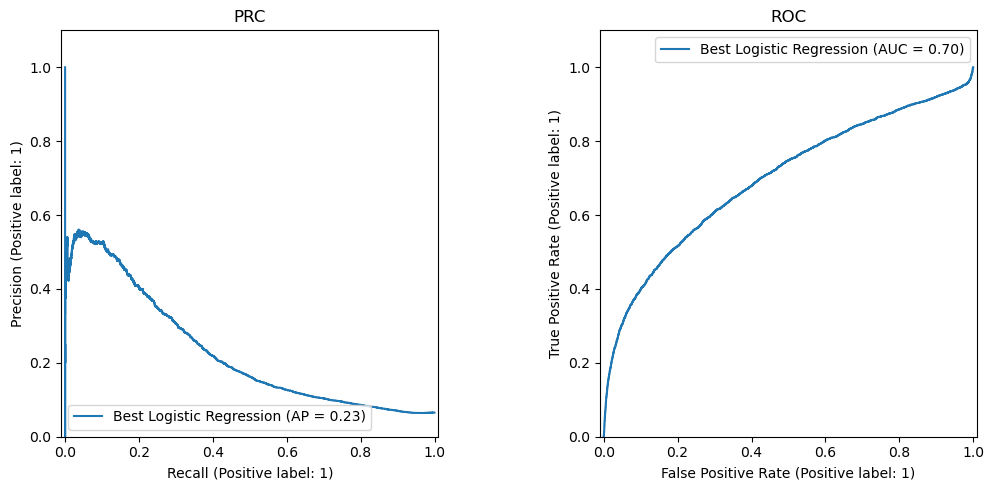

In [260]:
from sklearn.model_selection import GridSearchCV

params_grid = {'penalty' : ['l2', 'l1', 'elasticnet', None], 'C' : [1.0, 2.0, 5.0, 0.5, 0.2, 0.1], }
clf = GridSearchCV(LogisticRegression(), param_grid=params_grid, scoring=roc_auc_score, cv=5)
clf.fit(X_train, y_train)
depict_pr_roc(y_test, clf.predict_proba(X_test)[:, 1], 'Best Logistic Regression')

## Опробуем DecisionTree. Видно, что обычное дерево выдает плохой roc-auc результат из-за свойства переобучения. Навесим на него лучшие параметры.

In [261]:
from sklearn.tree import DecisionTreeClassifier

Decision Tree metrics
AUC-PR: 0.29486
AUC-ROC: 0.61542


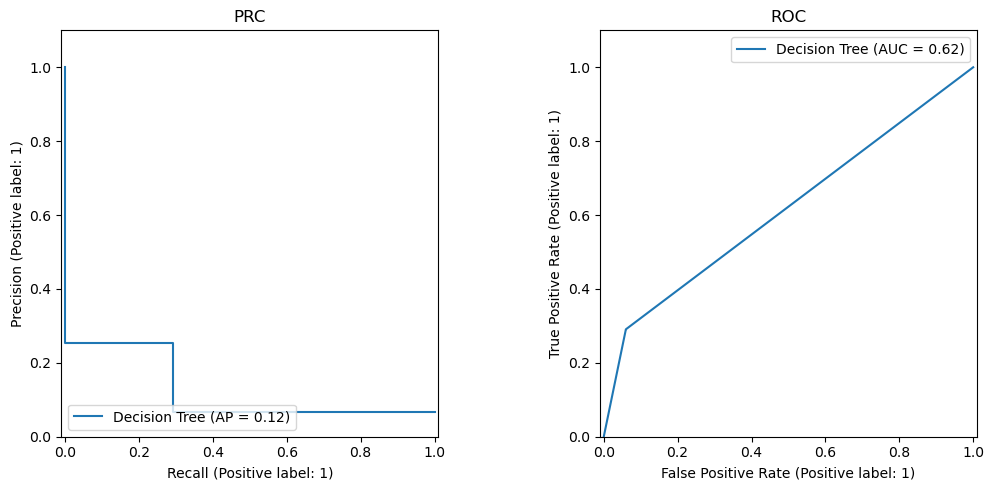

In [262]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
depict_pr_roc(y_test, tree_clf.predict_proba(X_test)[:, 1], 'Decision Tree')

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 191, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring fai

Best DecisionTree metrics
AUC-PR: 0.31802
AUC-ROC: 0.76261


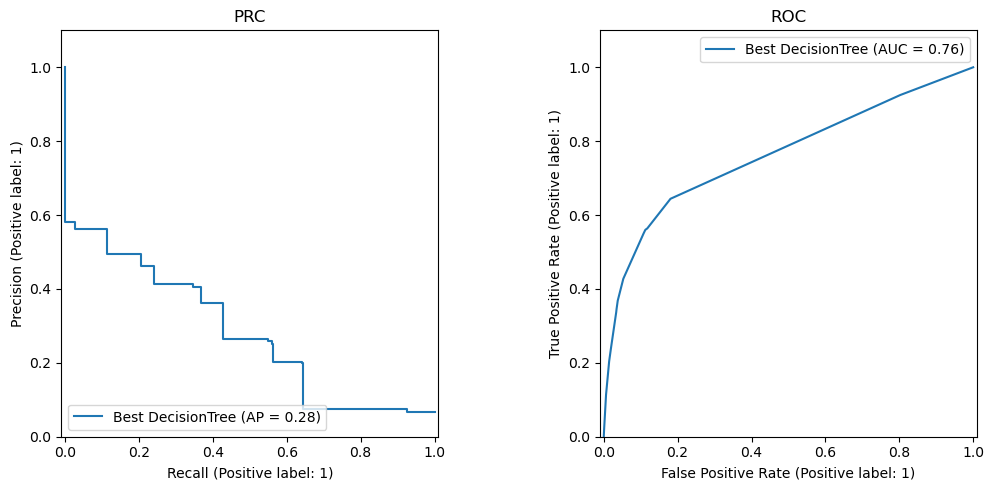

In [263]:
params_grid = {'criterion' : ['gini', 'entropy', 'log_loss'], 'splitter' : ['best', 'random'], 
               'max_depth' : [4, 8, 16, 20, 32], 
               'min_samples_split' : [2, 5, 12, 20, 100], 'max_features' : ['sqrt', 'log2']}
clf_tree = GridSearchCV(DecisionTreeClassifier(), param_grid=params_grid, scoring=roc_auc_score, cv=5)
clf_tree.fit(X_train, y_train)
depict_pr_roc(y_test, clf_tree.predict_proba(X_test)[:, 1], 'Best DecisionTree')

In [264]:
clf_tree.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'splitter': 'best'}

## И вот тут уже налицо прирост в размере 11 единиц. Теперь наша roc-auc статистика выдает достойный результат в размере 0.81 статистики roc-auc. Однако, перейдем к сильным ансамблям.

Random Forest metrics
AUC-PR: 0.36858
AUC-ROC: 0.84317


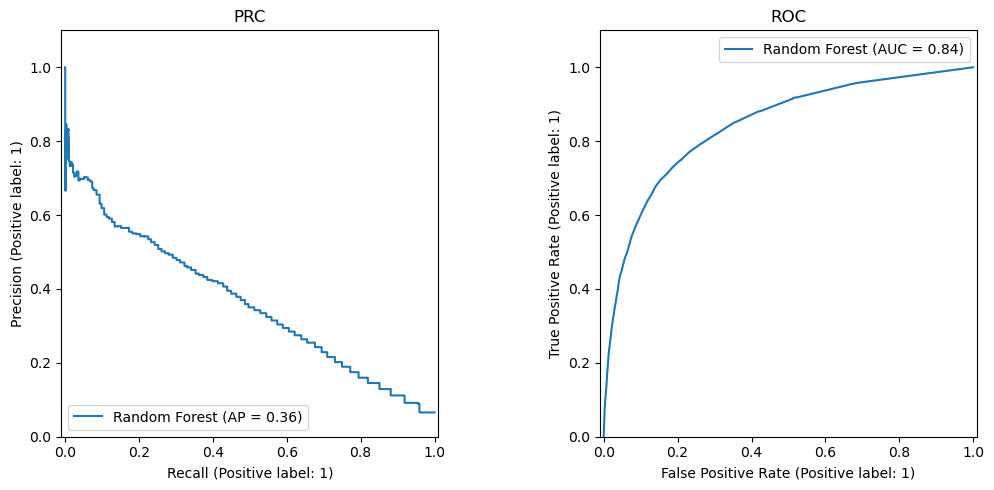

In [265]:
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier()
clf_forest.fit(X_train, y_train)
depict_pr_roc(y_test, clf_forest.predict_proba(X_test)[:, 1], 'Random Forest')

## Random Forest, как и следовало ожидать дает самый лучший результат из всех ранее опробованных моделей.

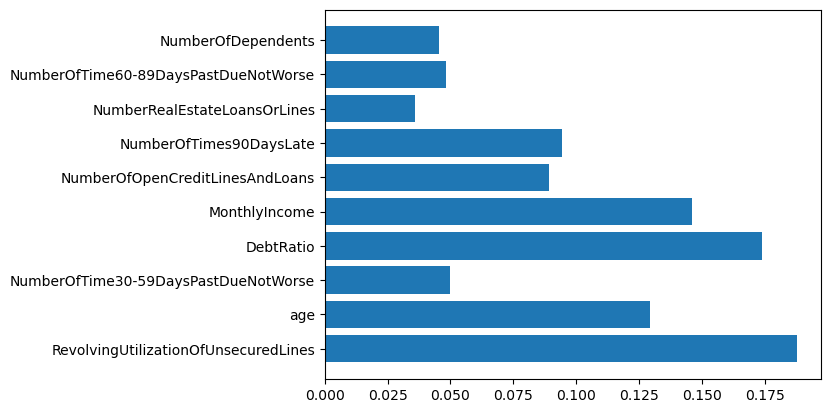

In [266]:
plt.barh(range(X_train.shape[1]), clf_forest.feature_importances_, align='center')
bar = plt.yticks(np.arange(X_train.shape[1]), numeric_train.drop(['SeriousDlqin2yrs', 'Unnamed: 0'], axis=1).columns)

## Бустинг. Сначала опробуем реализацию Boosting от scikit-learn. Ну, как и следовала ожидать один из самых теоретически сильных классификаторов дает заметное улучшение и равняетя с top-score-ом из kaggle competition.

Gradient Boosting Scikit metrics
AUC-PR: 0.40292
AUC-ROC: 0.86551


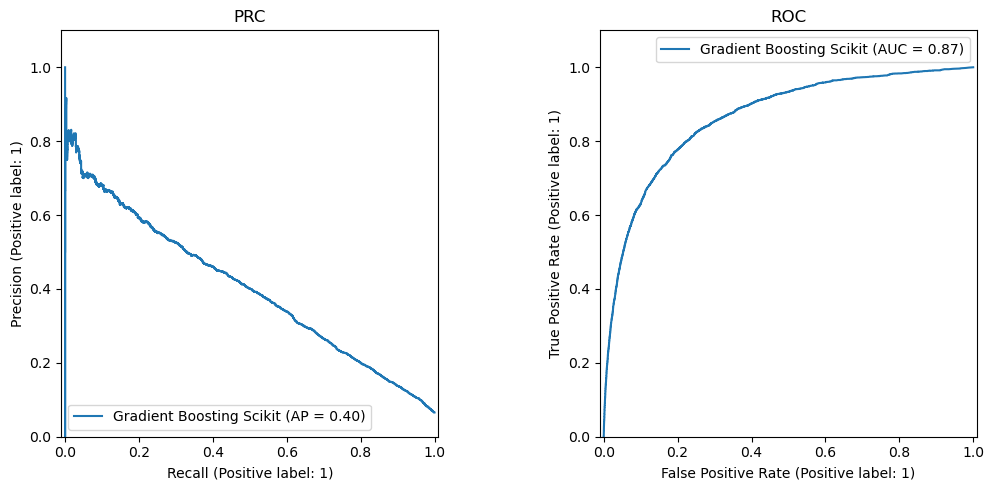

In [267]:
from sklearn.ensemble import GradientBoostingClassifier

boosting_scikit = GradientBoostingClassifier()
boosting_scikit.fit(X_train, y_train)
depict_pr_roc(y_test, boosting_scikit.predict_proba(X_test)[:, 1], 'Gradient Boosting Scikit')

## XGBoost. Получили небольшие ухудшения.

In [268]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


XGBoost metrics
AUC-PR: 0.39202
AUC-ROC: 0.86233


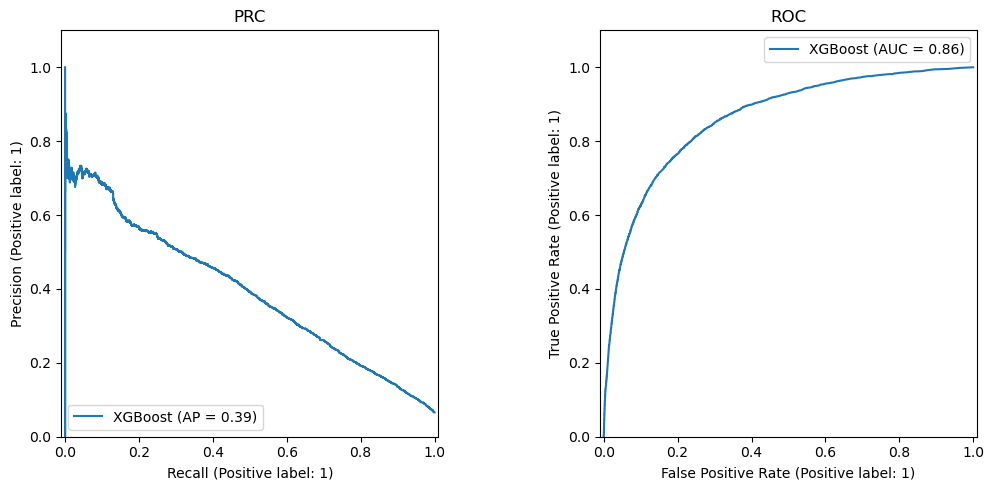

In [269]:
from xgboost import XGBClassifier

params_grid = {'n_estimators' : [5, 10, 14, 20, 25, 35, 40, 55, 75]}
xg_boosting = GridSearchCV(XGBClassifier(), param_grid=params_grid)
xg_boosting.fit(X_train, y_train)
depict_pr_roc(y_test, xg_boosting.predict_proba(X_test)[:, 1], "XGBoost")

In [270]:
%pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


[LightGBM] [Info] Number of positive: 6773, number of negative: 93727
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 978
[LightGBM] [Info] Number of data points in the train set: 100500, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067393 -> initscore=-2.627442
[LightGBM] [Info] Start training from score -2.627442
LightGBM metrics
AUC-PR: 0.39588
AUC-ROC: 0.86496


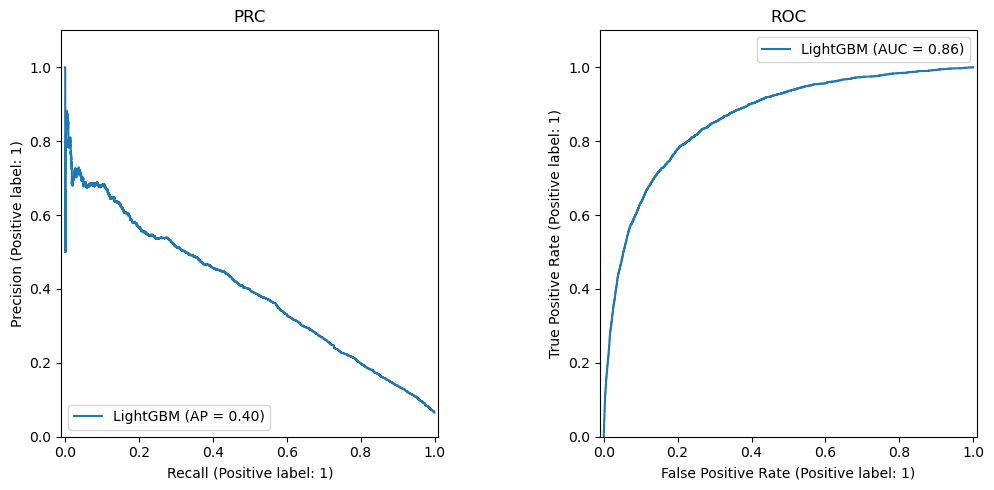

In [271]:
from lightgbm import LGBMClassifier

lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)

depict_pr_roc(y_test, lgb_clf.predict_proba(X_test)[:, 1], "LightGBM")

## Без явного тюнинга улучшений мы не получили, попробуем как-то поулучшать модель.

[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067400 -> initscore=-2.627323
[LightGBM] [Info] Start training from score -2.627323
[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067400 -> initscore=-2.627323
[LightGBM] [Info] Start training from score -2.627323
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004547 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067400 -> initscore=-2.627323
[Light

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067400 -> initscore=-2.627323
[LightGBM] [Info] Start training from score -2.627323
[LightGBM] [Info] Numb

[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067400 -> initscore=-2.627323
[LightGBM] [Info] Start training from score -2.627323
[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001776 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067400 -> initscore=-2.627323
[LightGBM] [Info] Start training from score -2.627323
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005726 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[Light

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067400 -> initscore=-2.627323
[LightGBM] [Info] Start training from score -2.627323
[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067400 -> initscore=-2.627323
[LightGBM] [Info] Start training from score -2.627323
[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067400 -> initscore=-2.627323
[LightGBM] [Info] Start training from score -2.627323
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of 

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004897 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067400 -> initscore=-2.627323
[LightGBM] [Info] Start training from score -2.627323
[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067400 -> initscore=-2.627323
[LightGBM] [Info] Start training from score -2.627323
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003816 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067400 -> initscore=-2.627323
[Light

[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067400 -> initscore=-2.627323
[LightGBM] [Info] Start training from score -2.627323
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067400 -> initscore=-2.627323
[LightGBM] [Info] Start training from score -2.627323
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[Light

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004723 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067400 -> initscore=-2.627323
[LightGBM] [Info] Start training from score -2.627323
[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067400 -> initscore=-2.627323
[LightGBM] [Info] Start training from score -2.627323
[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067400 -> initscore=-2.627323
[LightGBM] [Info] Start training from score -2.627323
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004963 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004668 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 970
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067400 -> initscore=-2.627323
[LightGBM] [Info] Start training from score -2.627323
[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5419, number of negative: 74981
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004696 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067400 -> initscore=-2.627323
[LightGBM] [Info] Start training from score -2.627323
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[Light

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001673 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[Light

[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 972
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067388 -> initscore=-2.627521
[LightGBM] [Info] Start training from score -2.627521
[LightGBM] [Info] Number of positive: 5418, number of negative: 74982
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 975
[LightGBM] [Info] Number of data points in the train set: 80400, number of used features: 10
[LightGBM] [Info] [bin

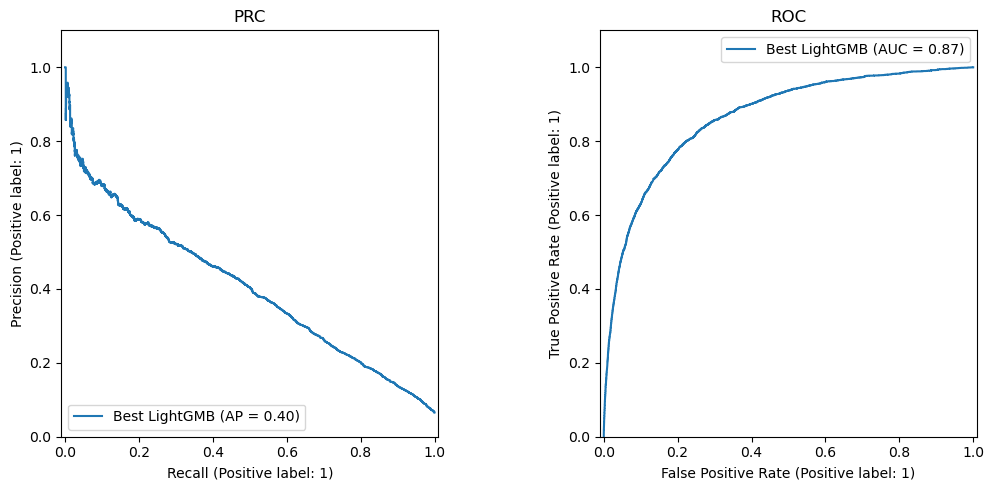

In [272]:
param_grid = {'num_leaves' : [15, 25, 31, 50], 'max_depth' : [8, 16, 32, 64], 
              'n_estimators' : [5, 10, 14, 20, 25, 35, 40, 55, 75, 100]}
lgb_clf = GridSearchCV(LGBMClassifier(), param_grid=param_grid)
lgb_clf.fit(X_train, y_train)
depict_pr_roc(y_test, lgb_clf.predict_proba(X_test)[:, 1], "Best LightGMB")

## И все-таки обогнать XGBoost удалось! 

## CatBoost

Learning rate set to 0.073766
0:	learn: 0.5900797	total: 14.3ms	remaining: 14.3s
1:	learn: 0.5141912	total: 26.2ms	remaining: 13.1s
2:	learn: 0.4503858	total: 37.3ms	remaining: 12.4s
3:	learn: 0.3963619	total: 49.6ms	remaining: 12.3s
4:	learn: 0.3563724	total: 61.9ms	remaining: 12.3s
5:	learn: 0.3273636	total: 73.8ms	remaining: 12.2s
6:	learn: 0.3002543	total: 86.4ms	remaining: 12.3s
7:	learn: 0.2793077	total: 99.1ms	remaining: 12.3s
8:	learn: 0.2624788	total: 113ms	remaining: 12.4s
9:	learn: 0.2494714	total: 126ms	remaining: 12.4s
10:	learn: 0.2406092	total: 139ms	remaining: 12.5s
11:	learn: 0.2325370	total: 152ms	remaining: 12.5s
12:	learn: 0.2239934	total: 164ms	remaining: 12.5s
13:	learn: 0.2170054	total: 177ms	remaining: 12.4s
14:	learn: 0.2118550	total: 190ms	remaining: 12.4s
15:	learn: 0.2066562	total: 204ms	remaining: 12.5s
16:	learn: 0.2029981	total: 218ms	remaining: 12.6s
17:	learn: 0.2003702	total: 231ms	remaining: 12.6s
18:	learn: 0.1978210	total: 244ms	remaining: 12.6s
19:

163:	learn: 0.1729431	total: 2.29s	remaining: 11.7s
164:	learn: 0.1729313	total: 2.31s	remaining: 11.7s
165:	learn: 0.1728916	total: 2.32s	remaining: 11.7s
166:	learn: 0.1728618	total: 2.34s	remaining: 11.7s
167:	learn: 0.1728149	total: 2.35s	remaining: 11.7s
168:	learn: 0.1727770	total: 2.37s	remaining: 11.7s
169:	learn: 0.1727502	total: 2.38s	remaining: 11.6s
170:	learn: 0.1727376	total: 2.4s	remaining: 11.6s
171:	learn: 0.1726995	total: 2.41s	remaining: 11.6s
172:	learn: 0.1726650	total: 2.42s	remaining: 11.6s
173:	learn: 0.1726278	total: 2.44s	remaining: 11.6s
174:	learn: 0.1725901	total: 2.45s	remaining: 11.5s
175:	learn: 0.1725632	total: 2.46s	remaining: 11.5s
176:	learn: 0.1725315	total: 2.48s	remaining: 11.5s
177:	learn: 0.1724877	total: 2.49s	remaining: 11.5s
178:	learn: 0.1724323	total: 2.51s	remaining: 11.5s
179:	learn: 0.1723963	total: 2.52s	remaining: 11.5s
180:	learn: 0.1723639	total: 2.53s	remaining: 11.5s
181:	learn: 0.1723412	total: 2.55s	remaining: 11.4s
182:	learn: 0

329:	learn: 0.1677121	total: 4.64s	remaining: 9.41s
330:	learn: 0.1676581	total: 4.65s	remaining: 9.4s
331:	learn: 0.1676326	total: 4.67s	remaining: 9.39s
332:	learn: 0.1676028	total: 4.68s	remaining: 9.37s
333:	learn: 0.1675861	total: 4.69s	remaining: 9.36s
334:	learn: 0.1675660	total: 4.71s	remaining: 9.35s
335:	learn: 0.1675580	total: 4.72s	remaining: 9.33s
336:	learn: 0.1675291	total: 4.74s	remaining: 9.32s
337:	learn: 0.1675013	total: 4.75s	remaining: 9.3s
338:	learn: 0.1674671	total: 4.76s	remaining: 9.29s
339:	learn: 0.1674211	total: 4.78s	remaining: 9.28s
340:	learn: 0.1673815	total: 4.79s	remaining: 9.26s
341:	learn: 0.1673486	total: 4.81s	remaining: 9.25s
342:	learn: 0.1673312	total: 4.82s	remaining: 9.23s
343:	learn: 0.1673101	total: 4.84s	remaining: 9.22s
344:	learn: 0.1672805	total: 4.85s	remaining: 9.21s
345:	learn: 0.1672454	total: 4.87s	remaining: 9.21s
346:	learn: 0.1672013	total: 4.89s	remaining: 9.2s
347:	learn: 0.1671620	total: 4.9s	remaining: 9.18s
348:	learn: 0.16

498:	learn: 0.1633939	total: 7.17s	remaining: 7.2s
499:	learn: 0.1633670	total: 7.19s	remaining: 7.19s
500:	learn: 0.1633423	total: 7.2s	remaining: 7.17s
501:	learn: 0.1633134	total: 7.22s	remaining: 7.16s
502:	learn: 0.1632876	total: 7.24s	remaining: 7.15s
503:	learn: 0.1632620	total: 7.25s	remaining: 7.13s
504:	learn: 0.1632434	total: 7.26s	remaining: 7.12s
505:	learn: 0.1632264	total: 7.28s	remaining: 7.11s
506:	learn: 0.1631942	total: 7.29s	remaining: 7.09s
507:	learn: 0.1631574	total: 7.31s	remaining: 7.08s
508:	learn: 0.1631341	total: 7.32s	remaining: 7.06s
509:	learn: 0.1631207	total: 7.33s	remaining: 7.05s
510:	learn: 0.1630967	total: 7.35s	remaining: 7.03s
511:	learn: 0.1630628	total: 7.36s	remaining: 7.02s
512:	learn: 0.1630354	total: 7.38s	remaining: 7s
513:	learn: 0.1630027	total: 7.39s	remaining: 6.99s
514:	learn: 0.1629752	total: 7.41s	remaining: 6.98s
515:	learn: 0.1629473	total: 7.42s	remaining: 6.96s
516:	learn: 0.1629289	total: 7.44s	remaining: 6.95s
517:	learn: 0.162

664:	learn: 0.1593713	total: 9.52s	remaining: 4.79s
665:	learn: 0.1593460	total: 9.53s	remaining: 4.78s
666:	learn: 0.1593294	total: 9.55s	remaining: 4.77s
667:	learn: 0.1593112	total: 9.56s	remaining: 4.75s
668:	learn: 0.1592868	total: 9.58s	remaining: 4.74s
669:	learn: 0.1592508	total: 9.59s	remaining: 4.72s
670:	learn: 0.1592397	total: 9.61s	remaining: 4.71s
671:	learn: 0.1592187	total: 9.62s	remaining: 4.7s
672:	learn: 0.1592025	total: 9.63s	remaining: 4.68s
673:	learn: 0.1591876	total: 9.65s	remaining: 4.67s
674:	learn: 0.1591489	total: 9.66s	remaining: 4.65s
675:	learn: 0.1591281	total: 9.67s	remaining: 4.64s
676:	learn: 0.1591150	total: 9.69s	remaining: 4.62s
677:	learn: 0.1590985	total: 9.7s	remaining: 4.61s
678:	learn: 0.1590769	total: 9.71s	remaining: 4.59s
679:	learn: 0.1590557	total: 9.72s	remaining: 4.58s
680:	learn: 0.1590364	total: 9.74s	remaining: 4.56s
681:	learn: 0.1590143	total: 9.75s	remaining: 4.55s
682:	learn: 0.1589841	total: 9.77s	remaining: 4.53s
683:	learn: 0.

831:	learn: 0.1558354	total: 11.9s	remaining: 2.4s
832:	learn: 0.1558115	total: 11.9s	remaining: 2.38s
833:	learn: 0.1557920	total: 11.9s	remaining: 2.37s
834:	learn: 0.1557778	total: 11.9s	remaining: 2.35s
835:	learn: 0.1557553	total: 11.9s	remaining: 2.34s
836:	learn: 0.1557310	total: 11.9s	remaining: 2.33s
837:	learn: 0.1557134	total: 12s	remaining: 2.31s
838:	learn: 0.1556958	total: 12s	remaining: 2.3s
839:	learn: 0.1556727	total: 12s	remaining: 2.28s
840:	learn: 0.1556619	total: 12s	remaining: 2.27s
841:	learn: 0.1556350	total: 12s	remaining: 2.25s
842:	learn: 0.1556165	total: 12s	remaining: 2.24s
843:	learn: 0.1555897	total: 12s	remaining: 2.22s
844:	learn: 0.1555702	total: 12s	remaining: 2.21s
845:	learn: 0.1555595	total: 12.1s	remaining: 2.19s
846:	learn: 0.1555448	total: 12.1s	remaining: 2.18s
847:	learn: 0.1555353	total: 12.1s	remaining: 2.17s
848:	learn: 0.1555231	total: 12.1s	remaining: 2.15s
849:	learn: 0.1554901	total: 12.1s	remaining: 2.14s
850:	learn: 0.1554677	total: 1

999:	learn: 0.1527277	total: 14.3s	remaining: 0us
CatBoost metrics
AUC-PR: 0.38863
AUC-ROC: 0.86535


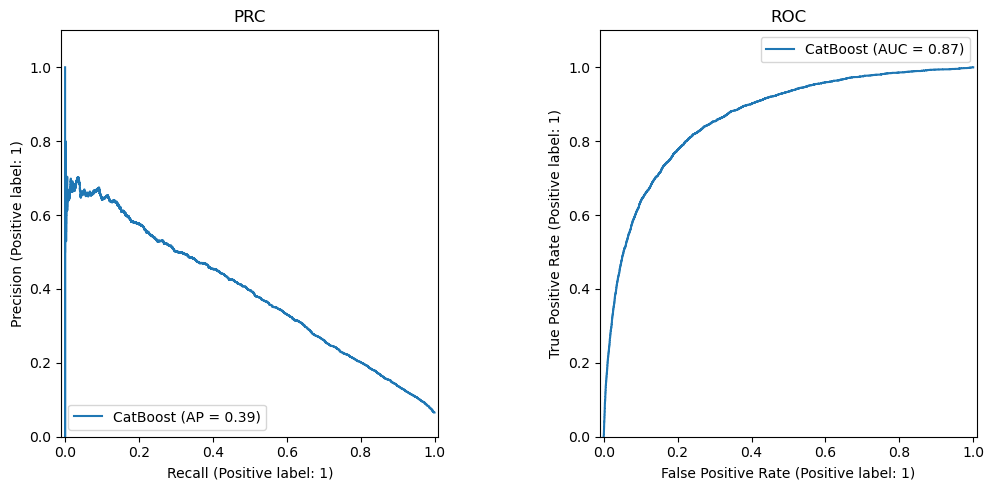

In [273]:
from catboost import CatBoostClassifier

catboost_clf = CatBoostClassifier()
catboost_clf.fit(X_train, y_train)
depict_pr_roc(y_test, catboost_clf.predict_proba(X_test)[:, 1], "CatBoost")

## Попробуем объединить все силы в 1 классификатор Блендингом.

In [274]:
pred1 = catboost_clf.predict_proba(X_train)
pred2 = clf_forest.predict_proba(X_train)
pred3 = lgb_clf.predict_proba(X_train)
pred4 = xg_boosting.predict_proba(X_train)

# Создаем признаки из предсказаний базовых моделей блендинга
blended_preds = np.column_stack((pred1, pred2, pred3, pred4))

meta_model = CatBoostClassifier()
meta_model.fit(blended_preds, y_train)
x_train, x_test, y_train, y_test = train_test_split(blended_preds, y_test, test_size=0.3)
roc_auc_score(y_test, meta_model.predict_proba(x_test)[:, 1])

Learning rate set to 0.073766
0:	learn: 0.4096283	total: 13ms	remaining: 13s
1:	learn: 0.2486091	total: 24ms	remaining: 12s
2:	learn: 0.1566319	total: 35.8ms	remaining: 11.9s
3:	learn: 0.1004551	total: 47.6ms	remaining: 11.9s
4:	learn: 0.0624495	total: 59.1ms	remaining: 11.8s
5:	learn: 0.0415017	total: 71.9ms	remaining: 11.9s
6:	learn: 0.0267372	total: 84.3ms	remaining: 12s
7:	learn: 0.0175943	total: 96.6ms	remaining: 12s
8:	learn: 0.0116520	total: 109ms	remaining: 12s
9:	learn: 0.0080312	total: 122ms	remaining: 12s
10:	learn: 0.0058400	total: 134ms	remaining: 12.1s
11:	learn: 0.0042578	total: 147ms	remaining: 12.1s
12:	learn: 0.0033093	total: 159ms	remaining: 12.1s
13:	learn: 0.0026060	total: 172ms	remaining: 12.1s
14:	learn: 0.0021536	total: 184ms	remaining: 12.1s
15:	learn: 0.0018540	total: 196ms	remaining: 12.1s
16:	learn: 0.0016553	total: 209ms	remaining: 12.1s
17:	learn: 0.0014699	total: 222ms	remaining: 12.1s
18:	learn: 0.0013047	total: 235ms	remaining: 12.1s
19:	learn: 0.001230

171:	learn: 0.0005788	total: 2.09s	remaining: 10.1s
172:	learn: 0.0005788	total: 2.1s	remaining: 10.1s
173:	learn: 0.0005788	total: 2.11s	remaining: 10s
174:	learn: 0.0005788	total: 2.12s	remaining: 10s
175:	learn: 0.0005788	total: 2.14s	remaining: 10s
176:	learn: 0.0005776	total: 2.15s	remaining: 9.99s
177:	learn: 0.0005754	total: 2.16s	remaining: 9.99s
178:	learn: 0.0005754	total: 2.17s	remaining: 9.97s
179:	learn: 0.0005751	total: 2.19s	remaining: 9.95s
180:	learn: 0.0005751	total: 2.19s	remaining: 9.93s
181:	learn: 0.0005751	total: 2.21s	remaining: 9.91s
182:	learn: 0.0005751	total: 2.22s	remaining: 9.89s
183:	learn: 0.0005748	total: 2.23s	remaining: 9.88s
184:	learn: 0.0005748	total: 2.24s	remaining: 9.86s
185:	learn: 0.0005748	total: 2.25s	remaining: 9.84s
186:	learn: 0.0005748	total: 2.26s	remaining: 9.82s
187:	learn: 0.0005748	total: 2.27s	remaining: 9.79s
188:	learn: 0.0005745	total: 2.28s	remaining: 9.78s
189:	learn: 0.0005745	total: 2.29s	remaining: 9.76s
190:	learn: 0.00057

330:	learn: 0.0005700	total: 3.8s	remaining: 7.67s
331:	learn: 0.0005700	total: 3.81s	remaining: 7.66s
332:	learn: 0.0005700	total: 3.82s	remaining: 7.65s
333:	learn: 0.0005700	total: 3.83s	remaining: 7.64s
334:	learn: 0.0005700	total: 3.84s	remaining: 7.62s
335:	learn: 0.0005700	total: 3.85s	remaining: 7.61s
336:	learn: 0.0005700	total: 3.86s	remaining: 7.59s
337:	learn: 0.0005700	total: 3.87s	remaining: 7.58s
338:	learn: 0.0005700	total: 3.88s	remaining: 7.57s
339:	learn: 0.0005700	total: 3.89s	remaining: 7.55s
340:	learn: 0.0005700	total: 3.9s	remaining: 7.54s
341:	learn: 0.0005700	total: 3.91s	remaining: 7.52s
342:	learn: 0.0005700	total: 3.92s	remaining: 7.51s
343:	learn: 0.0005700	total: 3.93s	remaining: 7.49s
344:	learn: 0.0005700	total: 3.94s	remaining: 7.48s
345:	learn: 0.0005700	total: 3.95s	remaining: 7.47s
346:	learn: 0.0005700	total: 3.96s	remaining: 7.46s
347:	learn: 0.0005700	total: 3.98s	remaining: 7.45s
348:	learn: 0.0005700	total: 3.99s	remaining: 7.44s
349:	learn: 0.

506:	learn: 0.0005700	total: 5.7s	remaining: 5.54s
507:	learn: 0.0005700	total: 5.71s	remaining: 5.53s
508:	learn: 0.0005700	total: 5.72s	remaining: 5.52s
509:	learn: 0.0005700	total: 5.73s	remaining: 5.5s
510:	learn: 0.0005700	total: 5.74s	remaining: 5.49s
511:	learn: 0.0005700	total: 5.75s	remaining: 5.48s
512:	learn: 0.0005700	total: 5.76s	remaining: 5.47s
513:	learn: 0.0005700	total: 5.77s	remaining: 5.45s
514:	learn: 0.0005700	total: 5.78s	remaining: 5.44s
515:	learn: 0.0005700	total: 5.79s	remaining: 5.43s
516:	learn: 0.0005700	total: 5.8s	remaining: 5.42s
517:	learn: 0.0005700	total: 5.81s	remaining: 5.41s
518:	learn: 0.0005700	total: 5.82s	remaining: 5.39s
519:	learn: 0.0005700	total: 5.83s	remaining: 5.38s
520:	learn: 0.0005700	total: 5.84s	remaining: 5.37s
521:	learn: 0.0005700	total: 5.85s	remaining: 5.36s
522:	learn: 0.0005700	total: 5.86s	remaining: 5.34s
523:	learn: 0.0005700	total: 5.87s	remaining: 5.33s
524:	learn: 0.0005700	total: 5.88s	remaining: 5.32s
525:	learn: 0.0

666:	learn: 0.0005700	total: 7.41s	remaining: 3.7s
667:	learn: 0.0005700	total: 7.42s	remaining: 3.69s
668:	learn: 0.0005700	total: 7.43s	remaining: 3.68s
669:	learn: 0.0005700	total: 7.44s	remaining: 3.66s
670:	learn: 0.0005700	total: 7.45s	remaining: 3.65s
671:	learn: 0.0005700	total: 7.46s	remaining: 3.64s
672:	learn: 0.0005700	total: 7.47s	remaining: 3.63s
673:	learn: 0.0005700	total: 7.48s	remaining: 3.62s
674:	learn: 0.0005700	total: 7.49s	remaining: 3.61s
675:	learn: 0.0005700	total: 7.5s	remaining: 3.6s
676:	learn: 0.0005700	total: 7.51s	remaining: 3.58s
677:	learn: 0.0005700	total: 7.52s	remaining: 3.57s
678:	learn: 0.0005700	total: 7.53s	remaining: 3.56s
679:	learn: 0.0005700	total: 7.54s	remaining: 3.55s
680:	learn: 0.0005700	total: 7.55s	remaining: 3.54s
681:	learn: 0.0005700	total: 7.56s	remaining: 3.52s
682:	learn: 0.0005700	total: 7.57s	remaining: 3.51s
683:	learn: 0.0005700	total: 7.58s	remaining: 3.5s
684:	learn: 0.0005700	total: 7.59s	remaining: 3.49s
685:	learn: 0.00

826:	learn: 0.0005700	total: 9.06s	remaining: 1.89s
827:	learn: 0.0005700	total: 9.07s	remaining: 1.88s
828:	learn: 0.0005700	total: 9.08s	remaining: 1.87s
829:	learn: 0.0005700	total: 9.09s	remaining: 1.86s
830:	learn: 0.0005700	total: 9.1s	remaining: 1.85s
831:	learn: 0.0005700	total: 9.11s	remaining: 1.84s
832:	learn: 0.0005700	total: 9.12s	remaining: 1.83s
833:	learn: 0.0005700	total: 9.13s	remaining: 1.82s
834:	learn: 0.0005700	total: 9.14s	remaining: 1.81s
835:	learn: 0.0005700	total: 9.15s	remaining: 1.79s
836:	learn: 0.0005700	total: 9.16s	remaining: 1.78s
837:	learn: 0.0005700	total: 9.17s	remaining: 1.77s
838:	learn: 0.0005700	total: 9.18s	remaining: 1.76s
839:	learn: 0.0005700	total: 9.19s	remaining: 1.75s
840:	learn: 0.0005700	total: 9.2s	remaining: 1.74s
841:	learn: 0.0005700	total: 9.21s	remaining: 1.73s
842:	learn: 0.0005700	total: 9.22s	remaining: 1.72s
843:	learn: 0.0005700	total: 9.23s	remaining: 1.71s
844:	learn: 0.0005700	total: 9.25s	remaining: 1.7s
845:	learn: 0.0

986:	learn: 0.0005700	total: 10.8s	remaining: 142ms
987:	learn: 0.0005700	total: 10.8s	remaining: 131ms
988:	learn: 0.0005700	total: 10.8s	remaining: 120ms
989:	learn: 0.0005700	total: 10.8s	remaining: 109ms
990:	learn: 0.0005700	total: 10.8s	remaining: 98.2ms
991:	learn: 0.0005700	total: 10.8s	remaining: 87.3ms
992:	learn: 0.0005700	total: 10.8s	remaining: 76.4ms
993:	learn: 0.0005700	total: 10.8s	remaining: 65.5ms
994:	learn: 0.0005700	total: 10.9s	remaining: 54.5ms
995:	learn: 0.0005700	total: 10.9s	remaining: 43.6ms
996:	learn: 0.0005700	total: 10.9s	remaining: 32.7ms
997:	learn: 0.0005700	total: 10.9s	remaining: 21.8ms
998:	learn: 0.0005700	total: 10.9s	remaining: 10.9ms
999:	learn: 0.0005700	total: 10.9s	remaining: 0us


ValueError: Found input variables with inconsistent numbers of samples: [100500, 49500]

## Итоги : лучшим оказался LightGBM. Воспользуемся же как раз им!

In [290]:
X_final = data_test.drop(['SeriousDlqin2yrs', 'Unnamed: 0'], axis=1)
X_table_res = X_final.copy()
X_final = scaler.fit_transform(X_final)
target_result_probs = lgb_clf.predict_proba(X_final)
target_result_classes = lgb_clf.predict(X_final)
df_res = X_table_res.copy()
df_res['SeriousDlqin2yrs'] = target_result_classes
df_res['SeriousDlqin2yrs'].unique()

array([0, 1], dtype=int64)